## 자본시장의 신용공여 및 대차거래와 종합주가지수의 상관관계 분석
<br></br>
<dev style="height:100px">
</dev>
 * 팀원 : 이용준(한국증권금융)
 * 분야 : 투자
 * 종류 : 분석계획서
 * 제출 : 파이썬을 확용한 빅데이터 분석


---------------------------------------------------------------------
## 목적
  
투자자는 수익 극대화를 위해 마진 트레이딩을 할 수 있으며, 이를 위해 신용거래 및 대차거래 등을 활용한다. 마진거래는 담보율을 유지해야 하는 특징 때문에 일반적으로,

현금 증거금 100%거래에 비해 보다 위험한 거래로 간주된다. 투자자의 강한 기대감의 결과인 마진거래와 종합주가지수의 상관관계를 신용공여잔고 및 대차거래잔고를 통해,

분석함으로써 이들 요소가 종합주가지수에 어떠한 영향을 미치는지 분석해 본다.

---------------------------------------------------------------------
## 목표

신용공여잔고 및 대차거래잔고를 독립변수로하고 종합주가지수(e.g. KOSPI, KOSDAQ)를 종속변수로하는 여러 회귀분석모형을 설계하여 상관관계분석 및 데이터 시각화를 

수행하고, 나아가 해당 머신러닝을 적용하여 신용공여잔고 등 시장지표를 통한 종합주가지수의 방향을 예측해 본다.
  
---------------------------------------------------------------------
## 분석 접근법

1. 선형회귀모형 설계 및 연관분석
  * 신용융자잔고
  * 대차거래잔고
  * 예탁증권담보융자
2. 머신러닝 모델 성능 평가 및 최적화
3. 예측모델 구현
---------------------------------------------------------------------
## 데이터

1. 신용공여잔고
  * 일별 신용거래융자잔고
2. 예탁증권담보융자
  * 일별 예탁증권담보융자잔고
3. 대차거래잔고
  * 일별 대차거래잔고
4. 종합주가지수
  * 일별 KOSPI

---------------------------------------------------------------------
## 가치

자본시장법에서는 투자자 및 금융기관의 수익을 극대화 하기 위해 마진거래에 해당하는 신용공여제도에 관한 규정이 명시되어 있으며 기관의 공매도, 증권결제, 헤지수단 등 

다양한 운용전략을 위한 대차거래 관련 규정도 존재한다. 이를 기반으로 투자중개업자 등 금융기관은 개인의 차입대주와 기관의 대차거래를 통한 차입공매도 서비스를 
제공하고

있다. 그러나 근래에 무차입 공매도 논란 등, 공매도와 관련하여 부정적인 여론이 존재하는 가운데, 마진거래가 실제로 종합주가지수에 얼마나 영향을 미치는지에 대한 연구는

제대로 이루어지지 않고 있으며, 개인의 신용대주는 대차거래보다 오랜 역사를 가지지만 여러 이유로 인하여 활성화되지 못하고 있다. 마진거래와 종합주가지수와의 관계분석은

공매도에 관한 새로운 시각을 제공할 기회가 될 것이다.

---------------------------------------------------------------------
## 난이도

방대한 양의 데이터 집합을 분석하므로 난이도는 '상'에 해당한다.

---------------------------------------------------------------------
## 연할분담

- 이용준 : 데이터 집합 생성 
- 이용준 : 기계학습모델 설계 
- 이용준 : 모델별 성능 평가 및 최적화
- 이용준 : 결과분석

---------------------------------------------------------------------
## 프로젝트 계획

- \`18.10.22 ~ \`18.10.25 : KOSPI 분석
- \`18.10.26 : KOSPI 기준 발표
- 연수 이후 : 머신러닝 알고리즘 적용 및 평가 계속 수행, KOSDAQ 등 다른 주가지수 적용

---------------------------------------------------------------------
## 보유 데이터 자산 확인

- [금융투자협회 전자공시서비스](http://dis.kofia.or.kr/)
 * 신용공여잔고
 * 대차거래잔고
 * 예탁증권담보융자잔고
 * 투자자예탁금
- [한국거래소 시장정보](http://marketdata.krx.co.kr/)
 * KOSPI

---------------------------------------------------------------------
## 보충자료

- 없음

---------------------------------------------------------------------

# Data analysis

In [74]:

from sklearn import model_selection
from sklearn import metrics
from sklearn import preprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.ion()

## 데이터 수집

dataset = pd.read_csv("project_data2.csv")

## 데이터 탐색, 전처리

dataset = dataset[1:]

dataset.head()

,Time,kospi_price,lending,credit_long,credit_short,secured_loan,lending_gr,credit_long_gr,credit_short_gr,secured_loan_gr,kospi_price_gr
1,2008-10-22,1134.59,16243701417120,1558719000000,6823000000,4722774000000,-0.0726,-0.0349,-0.0127,-0.0173,-0.0514
2,2008-10-23,1049.71,14878682630110,1509430000000,6063000000,4658239000000,-0.0840,-0.0316,-0.1114,-0.0137,-0.0748
3,2008-10-24,938.75,10620139577410,1456783000000,5727000000,4568727000000,-0.2862,-0.0349,-0.0554,-0.0192,-0.1057
4,2008-10-27,946.45,13590332412460,1369152000000,5605000000,4338890000000,0.2797,-0.0602,-0.0213,-0.0503,0.0082
5,2008-10-28,999.16,14677496508535,1167837000000,5410000000,4101443000000,0.0800,-0.1470,-0.0348,-0.0547,0.0557


In [75]:
dataset.shape

(2460, 11)

In [76]:
dataset.isnull().sum() # check missing values

Time               0
kospi_price        0
lending            0
credit_long        0
credit_short       0
secured_loan       0
lending_gr         0
credit_long_gr     0
credit_short_gr    0
secured_loan_gr    0
kospi_price_gr     0
dtype: int64

In [77]:
dataset.isnull().sum().sum() # check missing values

0

In [78]:
dataset.describe()

,kospi_price,lending,credit_long,credit_short,secured_loan,lending_gr,credit_long_gr,credit_short_gr,secured_loan_gr,kospi_price_gr
count,2460.000000,2.460000e+03,2.460000e+03,2.460000e+03,2.460000e+03,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000
mean,1944.916508,3.697358e+13,3.291974e+12,1.750068e+10,9.145270e+12,0.000701,0.000598,0.000422,0.000651,0.000340
std,295.542202,1.400737e+13,1.025541e+12,1.042755e+10,4.161060e+12,0.021203,0.011587,0.080339,0.013588,0.011546
min,938.750000,1.039388e+13,8.751140e+11,0.000000e+00,3.147510e+12,-0.286200,-0.167500,-0.815400,-0.227200,-0.105700
25%,1857.165000,2.435732e+13,2.595430e+12,8.610016e+09,6.619430e+12,-0.007925,-0.004100,-0.031300,-0.002100,-0.004400
50%,1976.095000,3.748011e+13,3.149055e+12,1.805175e+10,7.548652e+12,0.000000,0.001000,0.000000,0.000700,0.000400
75%,2055.925000,4.689631e+13,3.661667e+12,2.560397e+10,1.165285e+13,0.009000,0.005800,0.033125,0.003400,0.005800
max,2598.190000,6.767636e+13,6.294547e+12,5.119759e+10,1.906232e+13,0.279700,0.089900,1.510900,0.227000,0.119500


In [79]:
#plt.plot( s_oil_dataset['date'], s_oil_dataset['s_oil_price'] )
kospi_price_dataset = dataset[['Time','kospi_price']]

kospi_price_dataset.head()

,Time,kospi_price
1,2008-10-22,1134.59
2,2008-10-23,1049.71
3,2008-10-24,938.75
4,2008-10-27,946.45
5,2008-10-28,999.16


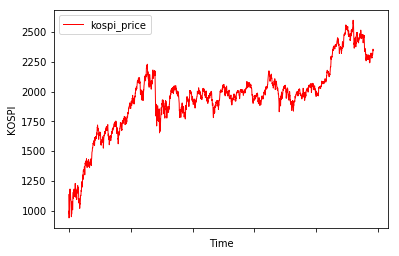

In [80]:
line_kospi_price = kospi_price_dataset.plot( x='Time', y='kospi_price', color='red', linewidth=1, rot=40 )
#plt.xlabel('Time')
#plt.ylabel('KOSPI')

line_kospi_price.set_xlabel('Time')
line_kospi_price.set_ylabel('KOSPI')

#fig_kospi_price.text(0.15, 0.85,'Last: ' + str(kospi_price_dataset['kospi_price'][1])\
#         + ' (as of: ' \
#         + kospi_price_dataset['Time'][1]\
#         + ')');

plt.show()

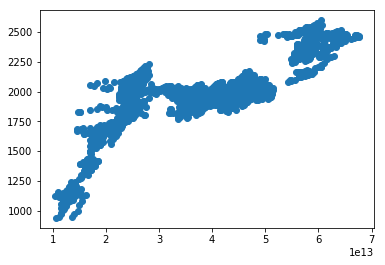

In [81]:
plt.figure()
plt.plot( dataset['lending'], dataset[ 'kospi_price' ], 'o' )

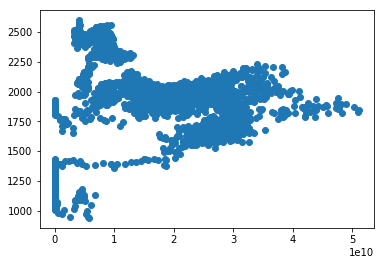

In [82]:
plt.figure()
plt.plot( dataset['credit_short'], dataset[ 'kospi_price' ], 'o' )

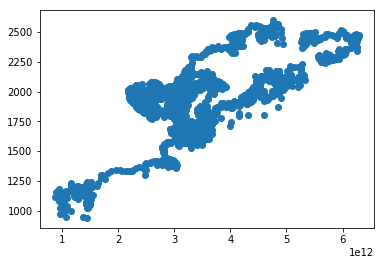

In [83]:
plt.figure()
plt.plot( dataset['credit_long'], dataset[ 'kospi_price' ], 'o' )

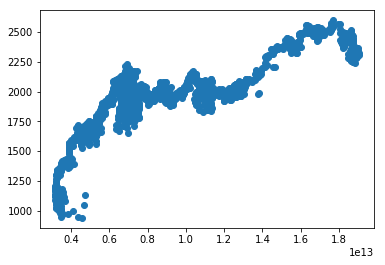

In [84]:
plt.figure()
plt.plot( dataset['secured_loan'], dataset[ 'kospi_price' ], 'o' )

Text(0,0.5,'credit_short')

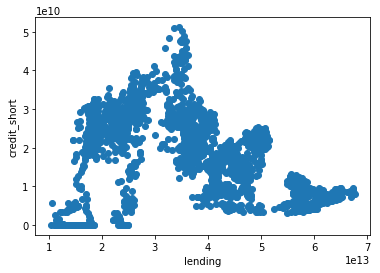

In [85]:
plt.figure()
plt.scatter( dataset['lending'], dataset[ 'credit_short' ] )

plt.xlabel( 'lending' )
plt.ylabel( 'credit_short' )

In [86]:
# 상관 분석, 산점도
np.corrcoef([dataset['kospi_price'], dataset[ 'lending' ], dataset["credit_long"], dataset["credit_short"], dataset['secured_loan']])

array([[ 1.        ,  0.83350899,  0.66869393, -0.02048656,  0.82381594],
       [ 0.83350899,  1.        ,  0.42719324, -0.29591255,  0.93685625],
       [ 0.66869393,  0.42719324,  1.        ,  0.03601673,  0.60606995],
       [-0.02048656, -0.29591255,  0.03601673,  1.        , -0.37294307],
       [ 0.82381594,  0.93685625,  0.60606995, -0.37294307,  1.        ]])

<Figure size 960x640 with 0 Axes>

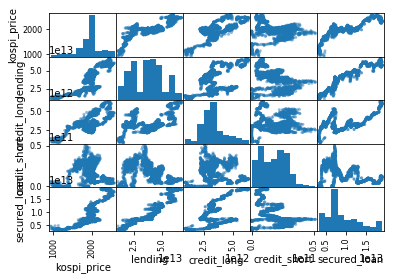

In [87]:
plt.figure( figsize=(12, 8), dpi=80 )

pd.plotting.scatter_matrix(dataset[["kospi_price", "lending", "credit_long", "credit_short", 'secured_loan']])

plt.show()

<Figure size 960x640 with 0 Axes>

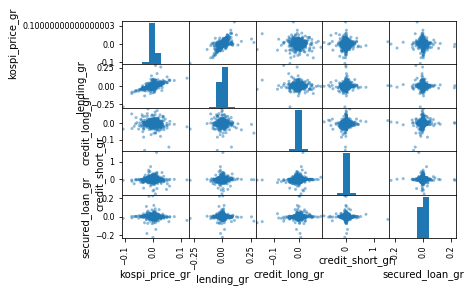

In [88]:
plt.figure( figsize=(12, 8), dpi=80 )

pd.plotting.scatter_matrix(dataset[["kospi_price_gr", "lending_gr", "credit_long_gr", "credit_short_gr", 'secured_loan_gr']])

plt.show()

## Simple linear regression (based credit long)

In [89]:
# 데이터를 학습 데이터와 테스트 데이터로 분리
X = dataset[["credit_long"]]
y = dataset["kospi_price"]


X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state=20181025)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1722, 1), (738, 1), (1722,), (738,))

In [90]:
## 훈련: 선형 회귀 모델

from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

#model.intercept_

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [91]:
model.coef_

array([1.95495341e-10])

In [92]:
model.intercept_

1301.6882932870374

In [93]:
x = np.array( [ min( dataset[ 'credit_long' ] ), max( dataset[ 'credit_long' ] ) ] ).reshape( -1, 1 )

In [94]:
model.predict( x )

array([1472.76900331, 2532.24296815])

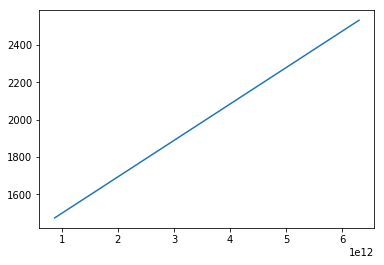

In [95]:
plt.plot( x, model.predict( x ) )

선형회귀 R^2 결정계수 : [ 44.52 ]


array([2670.15568174, 2865.65102295, 3061.14636416])

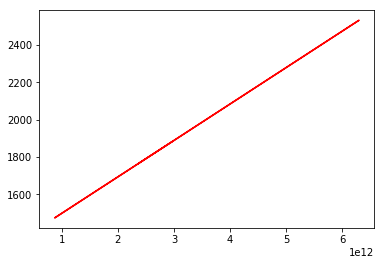

In [96]:
## 선형회귀모델 평가

# 학습 오차
print( '선형회귀 R^2 결정계수 : [ %.2lf ]' % ( model.score(X_train, y_train) * 100 ) )
pred = model.predict(X_train)
plt.plot( X_train['credit_long'], pred, c='red' )

np.sqrt(metrics.mean_squared_error(y_train, pred))
np.sqrt( sum((pred - y_train)**2 )/(y_train.shape[0]-2) ) # residual standard error


pred = model.predict(pd.DataFrame({'credit_long' : [7000000000000, 8000000000000, 9000000000000]}))
pred

In [97]:
# 테스트 오차
print( '선형회귀 R^2 결정계수 : [ %.2lf ]' % ( model.score(X_test, y_test) * 100 ) )
pred = model.predict(X_test)
print( '선형회귀 테스트오차 : [ ', np.sqrt(metrics.mean_squared_error(y_test, pred)), ' ]' )

선형회귀 R^2 결정계수 : [ 45.14 ]
선형회귀 테스트오차 : [  212.5072884366159  ]


## Simple linear regression (based lending)

In [98]:
# 데이터를 학습 데이터와 테스트 데이터로 분리
X2 = dataset[["lending"]]
y2 = dataset["kospi_price"]


X_train2, X_test2, y_train2, y_test2 = model_selection.train_test_split(X2, y2, train_size = 0.7, test_size = 0.3, random_state=20181025)
X_train2.shape, X_test2.shape, y_train2.shape, y_test2.shape

((1722, 1), (738, 1), (1722,), (738,))

In [99]:
## 훈련: 선형 회귀 모델

model2 = linear_model.LinearRegression()
model2.fit(X_train2, y_train2)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [100]:
model2.coef_

array([1.7786926e-11])

In [101]:
model2.intercept_

1284.1429301381452

In [102]:
x2 = np.array( [ min( dataset[ 'lending' ] ), max( dataset[ 'lending' ] ) ] ).reshape( -1, 1 )

In [103]:
model2.predict( x2 )

array([1469.01815354, 2487.89730036])

Text(0,0.5,'kospi_price')

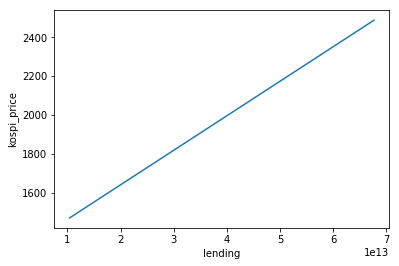

In [104]:
plt.plot( x2, model2.predict( x2 ) )
plt.xlabel('lending')
plt.ylabel('kospi_price')

선형회귀 학습 R^2 결정계수 : [ 70.10 ]


Text(0,0.5,'kospi_price')

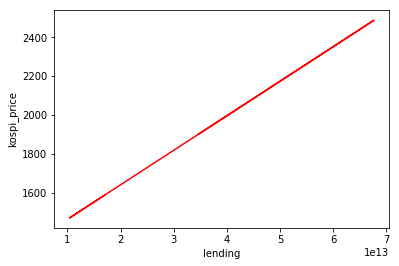

In [105]:
## 선형회귀모델 평가

# 학습 오차
print( '선형회귀 학습 R^2 결정계수 : [ %.2lf ]' % ( model2.score(X_train2, y_train2) * 100 ) )
pred2 = model2.predict(X_train2)
plt.plot( X_train2['lending'], pred2, c='red' )

np.sqrt(metrics.mean_squared_error(y_train2, pred2))
np.sqrt( sum((pred2 - y_train2)**2 )/(y_train2.shape[0]-2) ) # residual standard error


pred2 = model2.predict(pd.DataFrame({'lending' : [0.001, 0.001, 0.01]}))
pred2

plt.xlabel('lending')
plt.ylabel('kospi_price')

In [106]:
# 테스트 오차
print( '선형회귀 테스트 R^2 결정계수 : [ %.2lf ]' % ( model2.score(X_test2, y_test2) ) )
pred2 = model2.predict(X_test2)
print( '선형회귀 테스트오차 : [ ', np.sqrt(metrics.mean_squared_error(y_test2, pred2)), ' ]' )

선형회귀 테스트 R^2 결정계수 : [ 0.68 ]
선형회귀 테스트오차 : [  162.84243267755784  ]


## Multi-variables linear regression( based on balance )

In [107]:
# 다중선형회귀 

# 데이터를 학습 데이터와 테스트 데이터로 분리
X3 = dataset[["lending","credit_long"]]
y3 = dataset["kospi_price"]


X_train3, X_test3, y_train3, y_test3 = model_selection.train_test_split(X3, y3, train_size = 0.7, test_size = 0.3, random_state=20181025)
X_train3.shape, X_test3.shape, y_train3.shape, y_test3.shape

((1722, 2), (738, 2), (1722,), (738,))

In [108]:
model3 = linear_model.LinearRegression()
model3.fit(X_train3, y_train3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [109]:
model3.coef_

array([1.43484909e-11, 1.10777686e-10])

In [110]:
model3.intercept_

1048.3544274052476

In [111]:
## 선형회귀모델 평가

# 학습 오차
print( '선형회귀 학습 R^2 결정계수 : [ %.2lf ]' % ( model3.score(X_train3, y_train3) ) )
pred3 = model3.predict(X_train3)
#print( pred3[:5] )
print( '선형회귀 학습 오차 : [ ', np.sqrt(metrics.mean_squared_error(y_train3, pred3)), ' ]' )

선형회귀 학습 R^2 결정계수 : [ 0.82 ]
선형회귀 학습 오차 : [  127.65150843047113  ]


In [112]:
import sklearn as sk

np.sqrt(sum((pred3 - y_train3)**2)/(y_train3.shape[0]-2))  # residual standard error

127.72570286186213

In [113]:
# predictions on some data
pred3 = model3.predict(pd.DataFrame({'lending': [57000000000000, 70000000000000, 80000000000000], 'credit_long' : [6000000000000,7000000000000,8000000000000]}))    # 56606188024912	5926684997006
print(pred3[:3])

[2530.88451946 2828.19258614 3082.45518024]


In [114]:
# predict for test data
print( '선형회귀 테스트 R^2 결정계수 : [ %.2lf ]' % model3.score(X_test3, y_test3) )
pred3 = model3.predict(X_test3)
#print( pred3[:5] )
print( '선형회귀 테스트 오차 : [ ', np.sqrt(metrics.mean_squared_error(y_test3, pred3)), ' ]' )

선형회귀 테스트 R^2 결정계수 : [ 0.80 ]
선형회귀 테스트 오차 : [  126.75723445843416  ]


## Multi-variables Linear regression based on Gradient Descent by tensorflow 

$$H(X) = w_1x_1 + w_2x_2 + b$$


$$cost(W, b)=\frac{1}{m}\sum_{i=1}^{m}(H(x_1^{i},x_2^{i})-y^{i})^{2}$$

In [179]:
import tensorflow as tf

x_data = dataset[ [ "credit_long","lending" ]]

x_data['credit_long'] = x_data['credit_long'] / 100000000
x_data['lending'] = x_data['lending'] / 100000000

#x_data = [ pd.to_numeric( dataset['credit_long'] ).astype(float), pd.to_numeric( dataset['lending'] ).astype(float) ]

#x_data['credit_long'] = pd.to_numeric(x_data['credit_long']).astype(float)
#x_data['lending'] = pd.to_numeric(x_data['lending']).astype(float)

#print( x_data[0][:5] )
#print( x_data[1][:5] )

#print(x_data)

x_data.shape

/Users/andrewyj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/andrewyj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(2460, 2)

In [180]:
y_data = dataset["kospi_price"]
print( y_data[:5] )

y_data.shape

1    1134.59
2    1049.71
3     938.75
4     946.45
5     999.16
Name: kospi_price, dtype: float64


(2460,)

In [181]:

W = tf.Variable(tf.random_uniform([2, 1], -1.0, 1.0, dtype=tf.float64))  

b = tf.Variable(tf.random_uniform([1], -1000.0, 1000.0, dtype=tf.float64))

# W와 곱해야 하기 때문에 x_data를 실수로 변경
hypothesis = tf.matmul(x_data, W) + b                  


cost = tf.reduce_mean(tf.square(hypothesis - y_data))

rate = tf.Variable(0.1)
optimizer = tf.train.GradientDescentOptimizer(rate)
train = optimizer.minimize(cost)

init = tf.initialize_all_variables()

sess = tf.Session()
sess.run(init)

# 테스트 출력
print(sess.run(W))
print(sess.run(tf.matmul(W, x_data)))

for step in range(2001):
    sess.run(train)

    if step%20 == 0:
        print(step, sess.run(cost), sess.run(W), sess.run(b))

sess.close()


TypeError: Expected binary or unicode string, got <tf.Tensor 'sub_11:0' shape=(2460, 2460) dtype=float64>